# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


In [52]:
#Viewing the response in order to complete the next step

url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "metric"
city_url = f"{url}{city}&APPID={weather_api_key}&units={units}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": -49.35,
        "lon": 70.2167
    },
    "dt": 1714965269,
    "id": 1546102,
    "main": {
        "feels_like": 0.46,
        "grnd_level": 998,
        "humidity": 85,
        "pressure": 999,
        "sea_level": 999,
        "temp": 6.01,
        "temp_max": 6.01,
        "temp_min": 6.01
    },
    "name": "Port-aux-Fran\u00e7ais",
    "sys": {
        "country": "TF",
        "sunrise": 1714962681,
        "sunset": 1714996804
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 265,
        "gust": 14.57,
        "speed": 12
    }
}


In [53]:
#testing to see if the indexes work before running the loop
## DELETE LATER ##
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

city_data = ({"City": city, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})
city_data

{'City': 'port-aux-francais',
 'Lat': -49.35,
 'Lng': 70.2167,
 'Max Temp': 6.01,
 'Humidity': 85,
 'Cloudiness': 86,
 'Wind Speed': 12,
 'Country': 'TF',
 'Date': 1714965269}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&APPID={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | tomok bolon
City not found. Skipping...
Processing Record 3 of Set 1 | happy valley-goose bay
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | mont-laurier
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | pokachi
Processing Record 10 of Set 1 | sandnessjoen
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | keflavik
Processing Record 21 of 

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,1.05,89,100,13.20,SJ,1714965246
1,happy valley-goose bay,53.3168,-60.3315,8.77,80,100,3.16,CA,1714965247
2,badger,64.8000,-147.5333,14.95,39,100,6.69,US,1714965271
3,waitangi,-43.9535,-176.5597,13.79,81,66,3.13,NZ,1714965272
4,mont-laurier,46.5501,-75.4993,11.10,94,100,2.74,CA,1714965272


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,1.05,89,100,13.20,SJ,1714965246
1,happy valley-goose bay,53.3168,-60.3315,8.77,80,100,3.16,CA,1714965247
2,badger,64.8000,-147.5333,14.95,39,100,6.69,US,1714965271
3,waitangi,-43.9535,-176.5597,13.79,81,66,3.13,NZ,1714965272
4,mont-laurier,46.5501,-75.4993,11.10,94,100,2.74,CA,1714965272


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

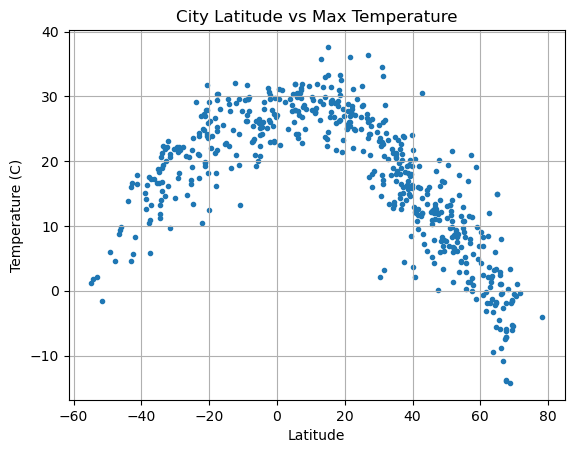

In [118]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, marker= "." )

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

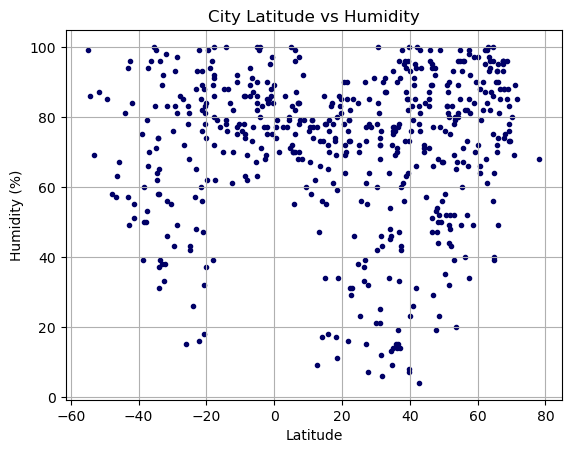

In [119]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, city_data_df["Humidity"],
            marker= ".", color = "#000066")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

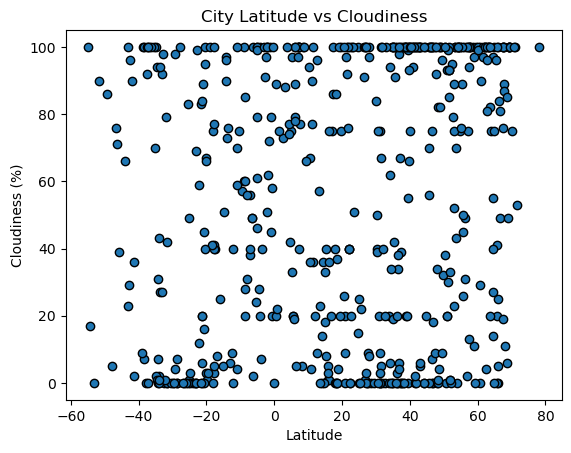

In [120]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, city_data_df["Cloudiness"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

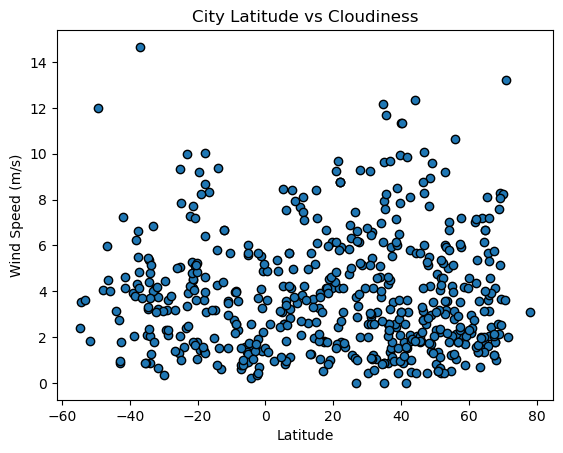

In [121]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, city_data_df["Wind Speed"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
def linear_regress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regression = intercept + (slope * x)
    line_eq = f"y={round(slope, 2)}x + {round(intercept, 2)}"
    plt.scatter(x,y)
    plt.plot(x, regression, color = "r")
    print(f"The r-value is {round(pearsonr(x,y)[0],2)}")

def annotation(line_eq, a,b):
    plt.annotate(line_eq,xy=(16,10),fontsize= 15,color="r")


In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,1.05,89,100,13.20,SJ,1714965246
1,happy valley-goose bay,53.3168,-60.3315,8.77,80,100,3.16,CA,1714965247
2,badger,64.8000,-147.5333,14.95,39,100,6.69,US,1714965271
4,mont-laurier,46.5501,-75.4993,11.10,94,100,2.74,CA,1714965272
6,bethel,41.3712,-73.4140,10.76,89,100,0.98,US,1714965273


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.79,81,66,3.13,NZ,1714965272
5,grytviken,-54.2811,-36.5092,1.77,86,17,3.52,GS,1714965273
9,papatowai,-46.5619,169.4708,8.84,57,76,5.98,NZ,1714965275
10,blackmans bay,-43.0167,147.3167,15.96,57,23,0.89,AU,1714965240
13,avarua,-21.2078,-159.7750,27.03,89,20,7.72,CK,1714965257


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.89


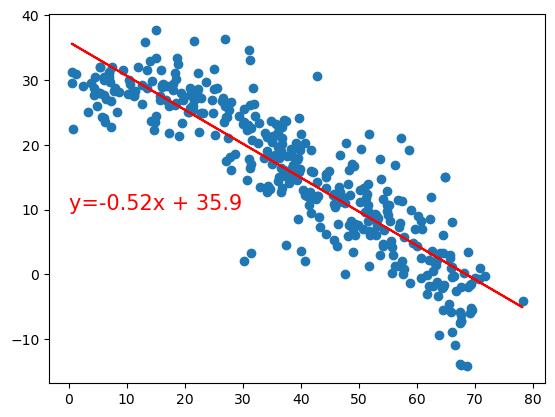

In [93]:
# Linear regression on Northern Hemisphere

#using func 1
n_lat = northern_hemi_df["Lat"]
linear_regress(n_lat, northern_hemi_df["Max Temp"])

# using func 2
annotation(line_eq, 0, 10)

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

The r-value is 0.78


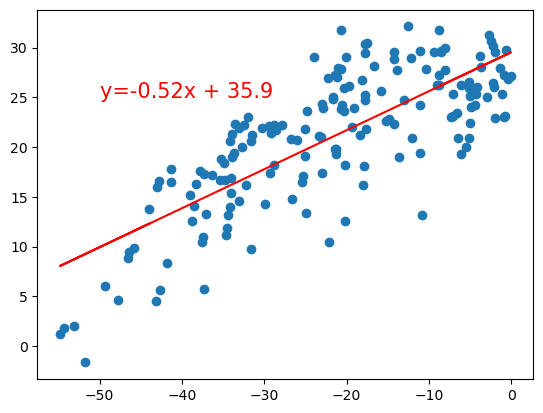

In [96]:
# Linear regression on Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Max Temp"])
annotation(line_eq, -50, 25)

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.16


Text(0, 0.5, 'Humidity (%)')

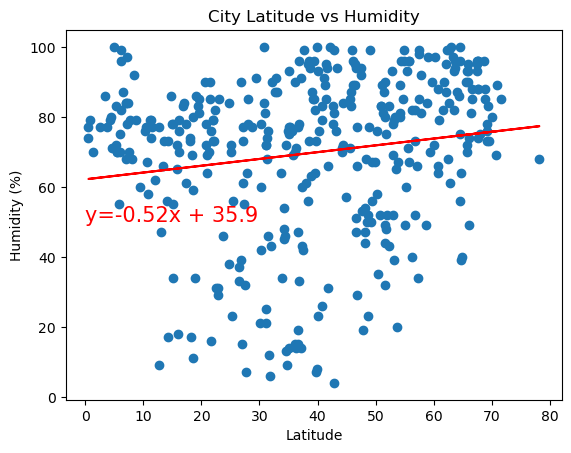

In [99]:
# Northern Hemisphere
linear_regress(n_lat, northern_hemi_df["Humidity"])
annotation(line_eq, 0, 50)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-value is 0.25


Text(0, 0.5, 'Humidity (%)')

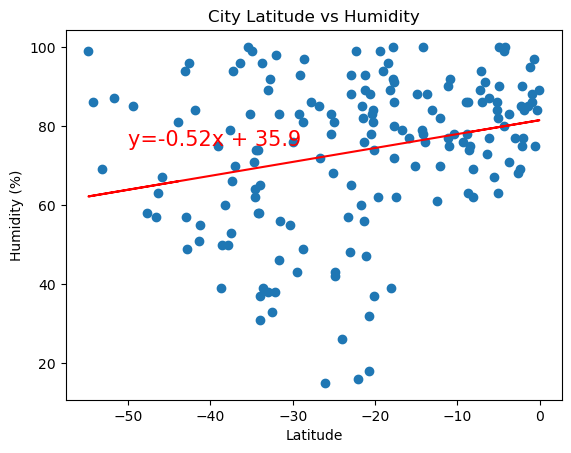

In [108]:
# Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Humidity"])
annotation(line_eq, -50, 75)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.17


Text(0, 0.5, 'Cloudiness (%)')

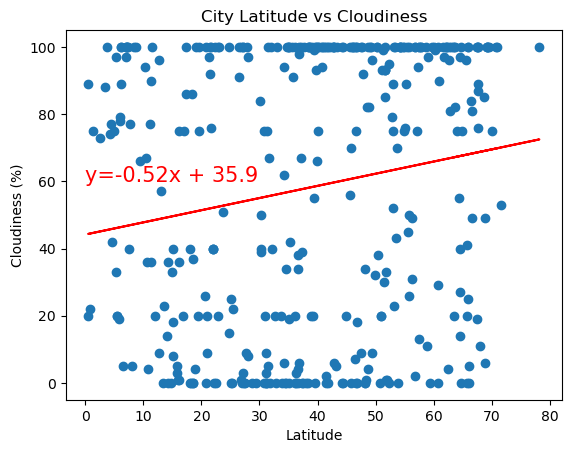

In [112]:
# Northern Hemisphere
linear_regress(n_lat, northern_hemi_df["Cloudiness"])
annotation(line_eq, 0, 60)

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-value is 0.12


Text(0, 0.5, 'Cloudiness (%)')

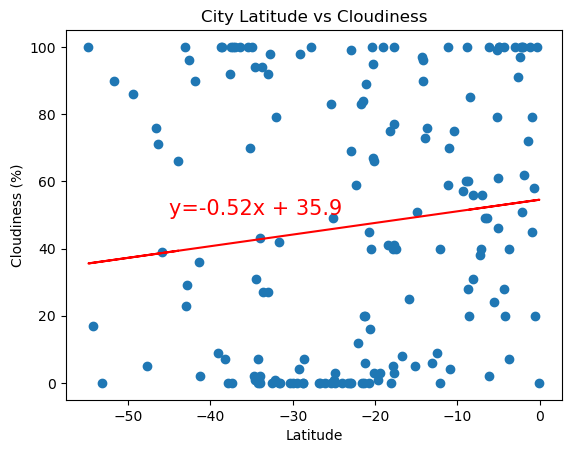

In [113]:
# Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Cloudiness"])
annotation(line_eq, -45, 50)

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.05


Text(0, 0.5, 'Wind Speed (m/s)')

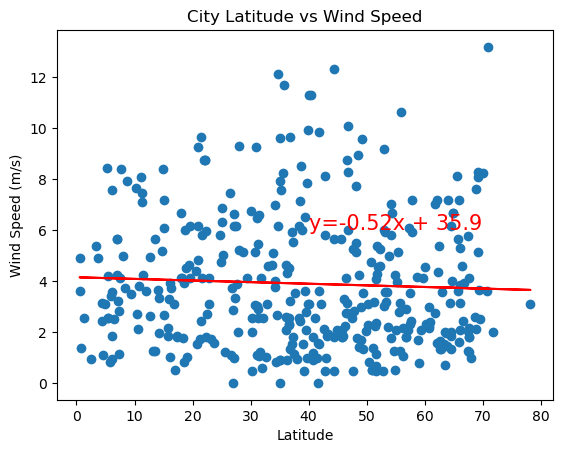

In [114]:
# Northern Hemisphere
linear_regress(n_lat, northern_hemi_df["Wind Speed"])
annotation(line_eq, 40, 6)

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

The r-value is -0.18


Text(0, 0.5, 'Wind Speed (m/s)')

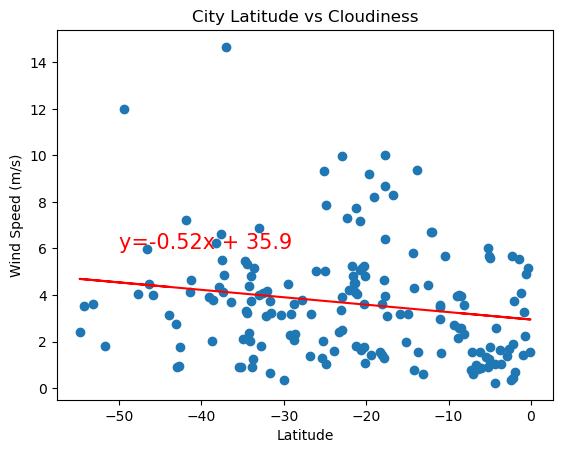

In [117]:
# Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Wind Speed"])
annotation(line_eq, -50, 6)

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE